In [14]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd 
import seaborn as sns

plt.rcParams['figure.figsize'] = [15, 10]

import warnings
warnings.filterwarnings('ignore')

Загружаем данные о недвижимости в Бостоне

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Посмотрим описание набора данных

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
type(boston_dataset.data), type(boston_dataset.target)

(numpy.ndarray, numpy.ndarray)

Данные представлены в виде numpy.ndarray-массивов,
сконвертируем их в более удобный для использования формат

In [135]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [136]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


добавим колонку, содержащую значения целевой переменной

In [137]:
boston['MEDV'] = boston_dataset.target

удалим категориальные признаки

In [138]:
boston.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [139]:
cols_to_drop = boston.columns[boston.nunique() < 10].tolist()
boston = boston.drop(cols_to_drop, axis=1)

выведем тепловую карту признаков

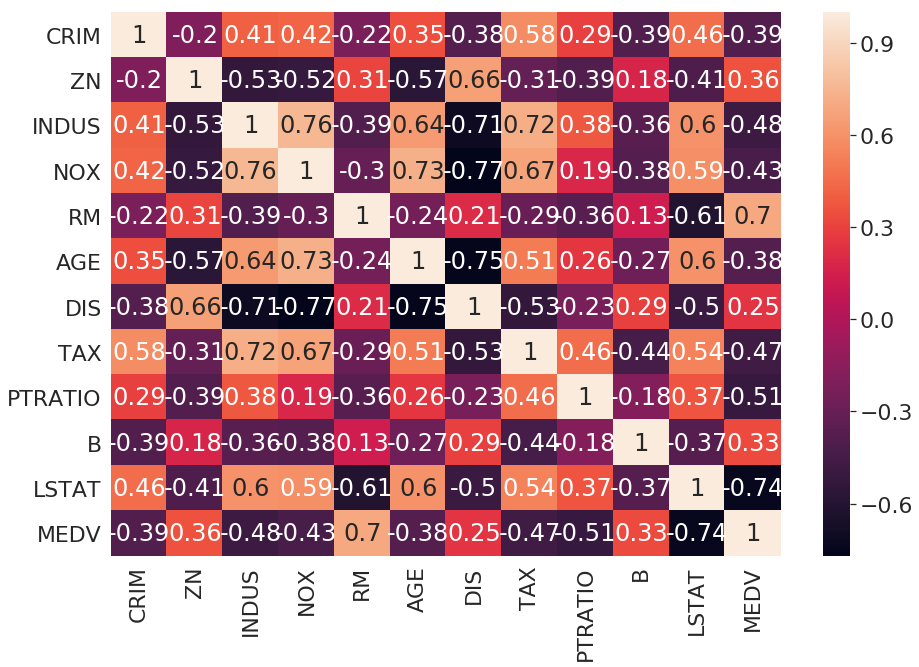

In [140]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

посмотрим на наиболее скоррелированные признаки. Зачем? <br>
Проанализировать влияние скоррелированных признаков на модель

In [141]:
abs_corr = correlation_matrix.abs()
abs_corr.unstack().sort_values(ascending=False)[len(boston_dataset.feature_names)+1::2]

INDUS    NOX        0.76
AGE      DIS        0.75
LSTAT    MEDV       0.74
AGE      NOX        0.73
TAX      INDUS      0.72
DIS      INDUS      0.71
RM       MEDV       0.70
NOX      TAX        0.67
ZN       DIS        0.66
INDUS    AGE        0.64
RM       LSTAT      0.61
LSTAT    AGE        0.60
AGE      LSTAT      0.60
LSTAT    NOX        0.59
TAX      CRIM       0.58
ZN       AGE        0.57
TAX      LSTAT      0.54
INDUS    ZN         0.53
DIS      TAX        0.53
NOX      ZN         0.52
TAX      AGE        0.51
AGE      TAX        0.51
DIS      LSTAT      0.50
MEDV     INDUS      0.48
TAX      MEDV       0.47
         PTRATIO    0.46
LSTAT    CRIM       0.46
TAX      B          0.44
NOX      MEDV       0.43
CRIM     NOX        0.42
                    ... 
RM       INDUS      0.39
INDUS    PTRATIO    0.38
NOX      B          0.38
AGE      MEDV       0.38
PTRATIO  INDUS      0.38
B        LSTAT      0.37
LSTAT    PTRATIO    0.37
MEDV     ZN         0.36
ZN       MEDV       0.36


посмотрим на корреляцию признаков и целевой переменной

In [142]:
corr_target = abs(correlation_matrix['MEDV'])
corr_features = corr_target#[corr_target > 0.5]
corr_features.sort_values(ascending=False)

MEDV       1.00
LSTAT      0.74
RM         0.70
PTRATIO    0.51
INDUS      0.48
TAX        0.47
NOX        0.43
CRIM       0.39
AGE        0.38
ZN         0.36
B          0.33
DIS        0.25
Name: MEDV, dtype: float64

In [143]:
print(boston[["LSTAT","PTRATIO"]].corr())
print(boston[["RM","LSTAT"]].corr())
print(boston[["AGE","DIS"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000
          AGE       DIS
AGE  1.000000 -0.747881
DIS -0.747881  1.000000


<Figure size 1440x720 with 0 Axes>

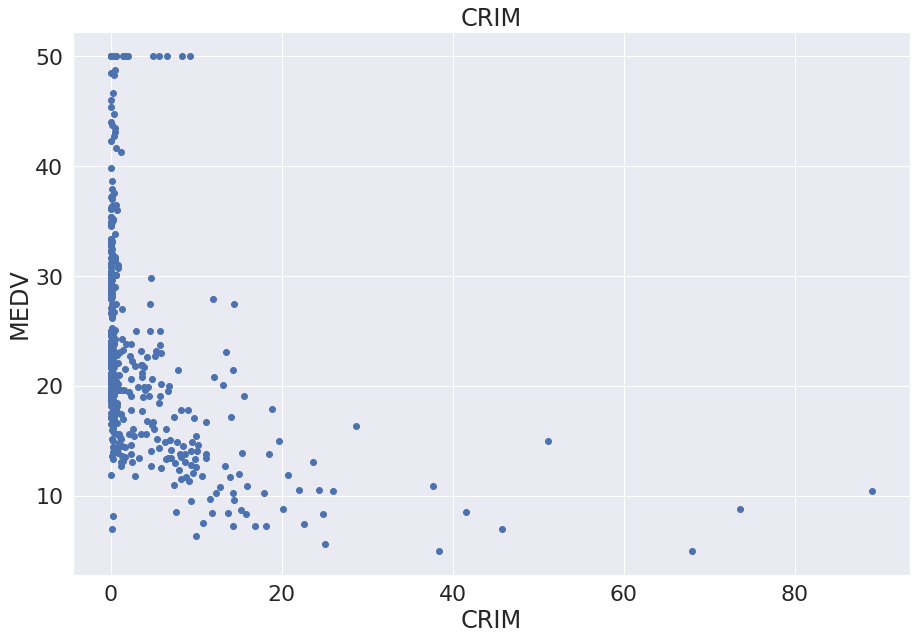

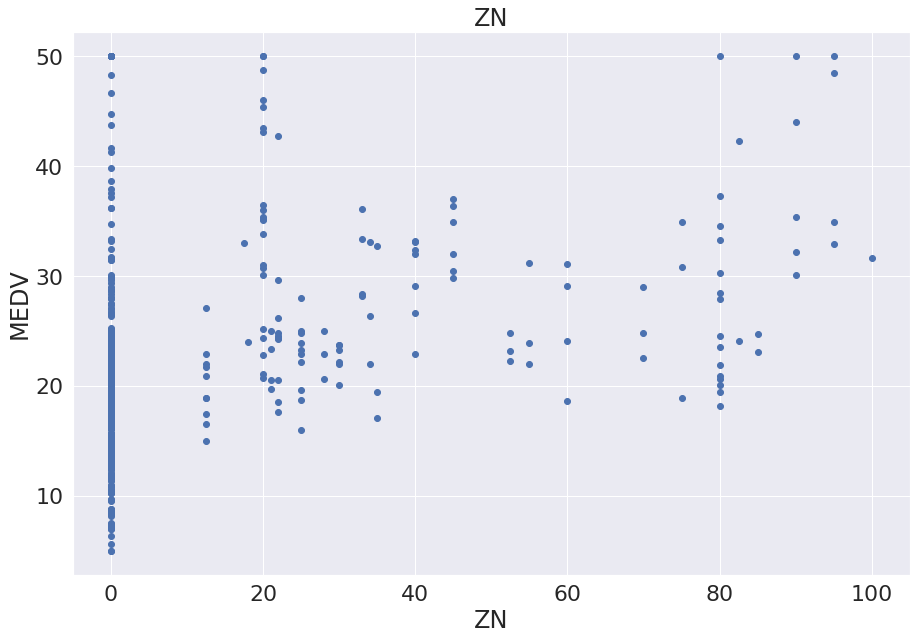

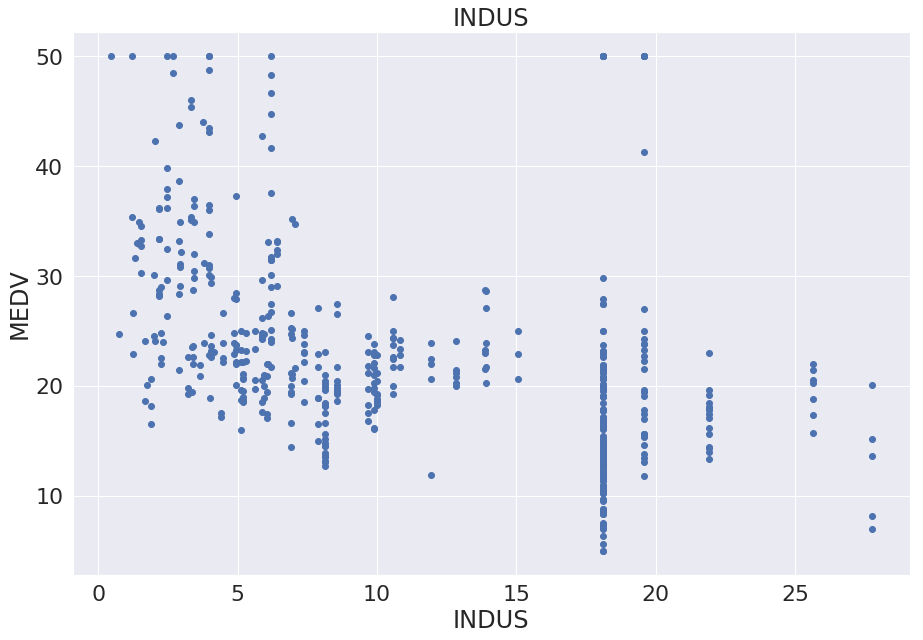

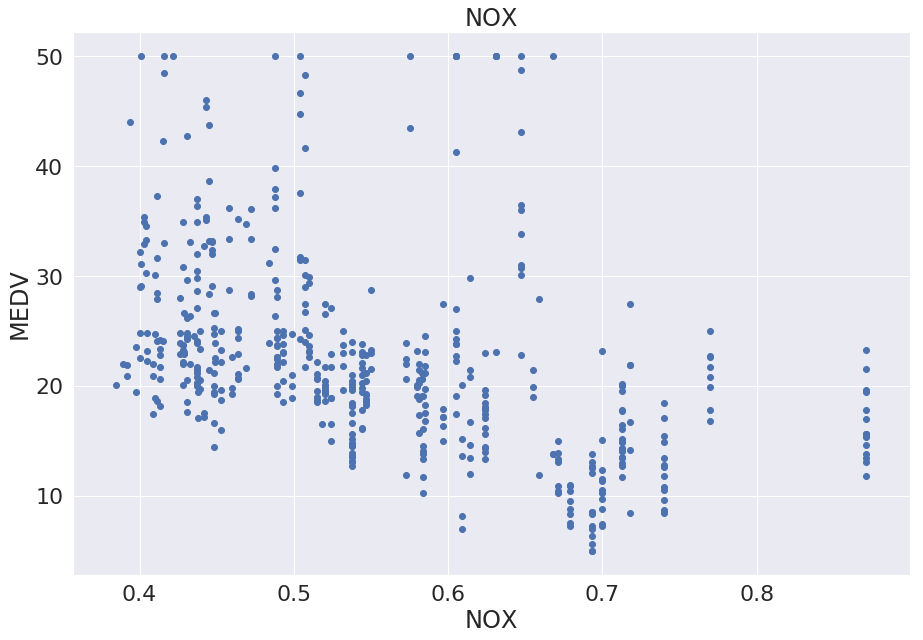

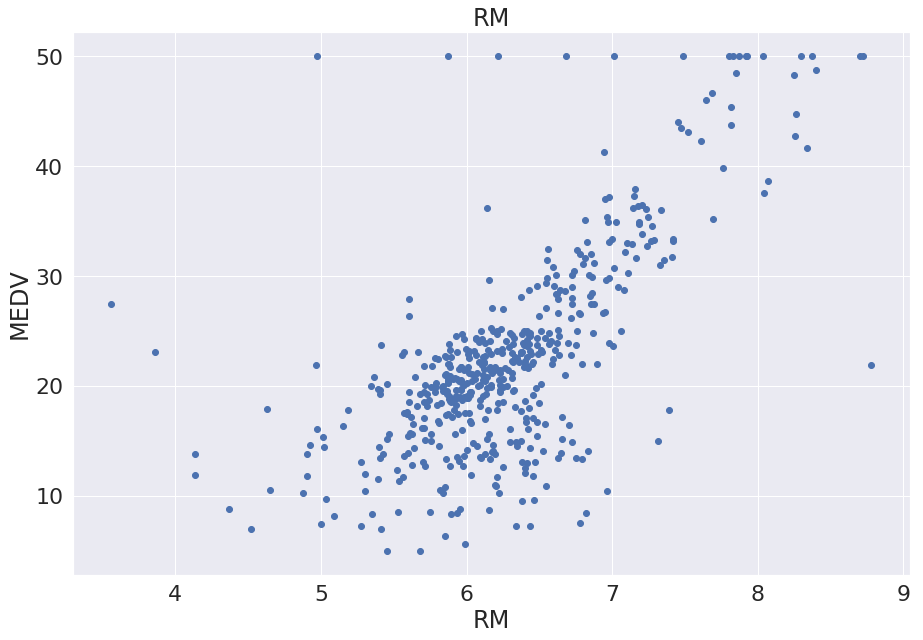

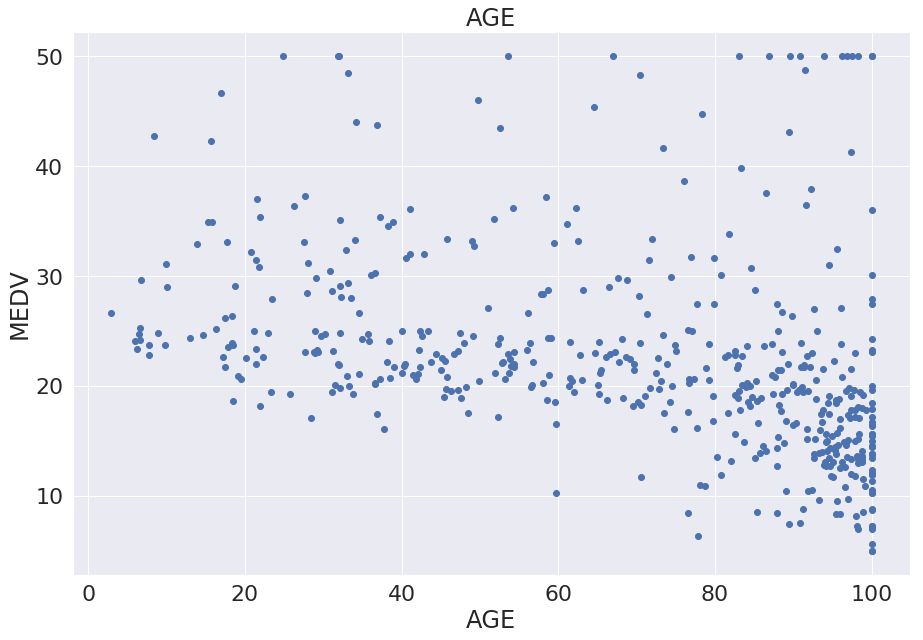

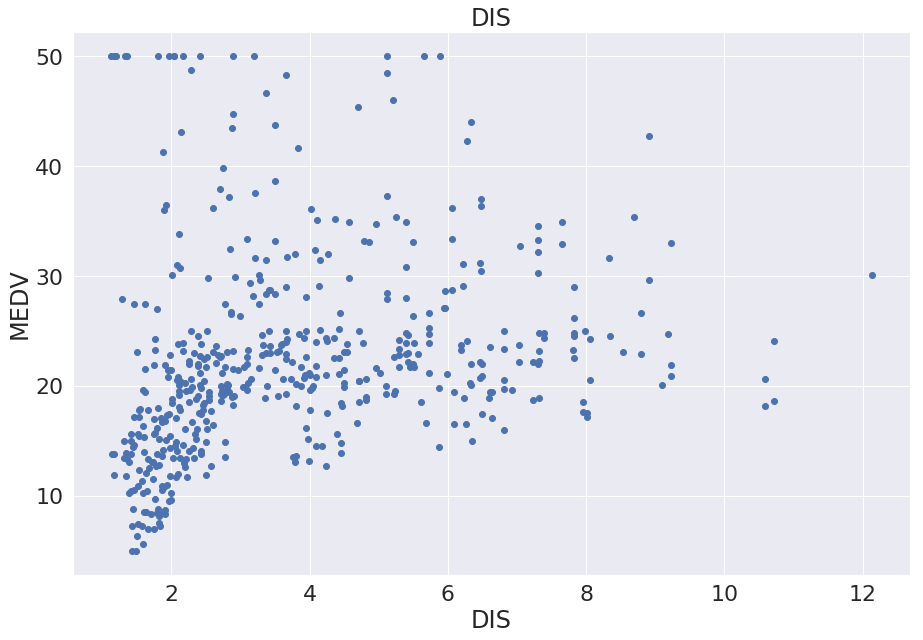

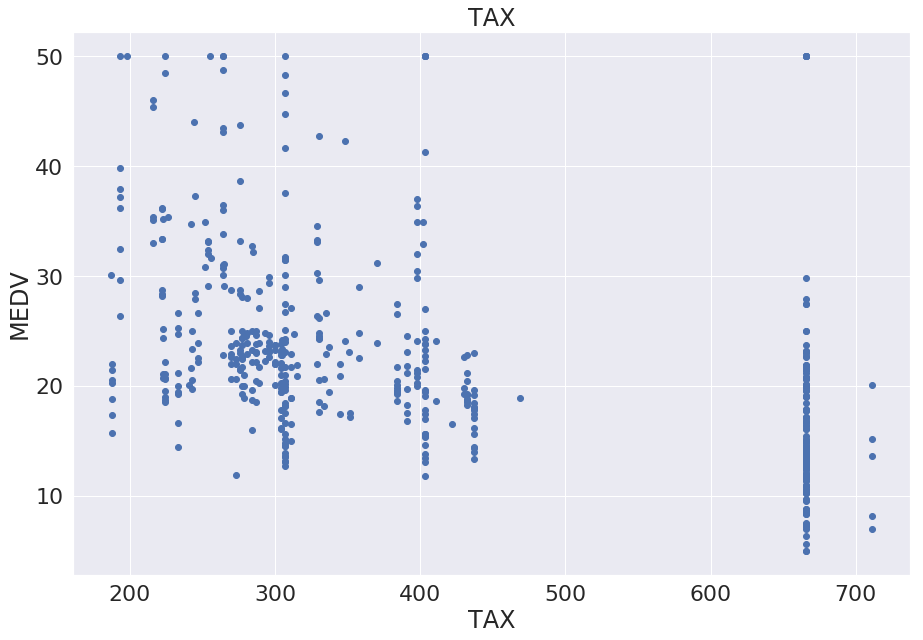

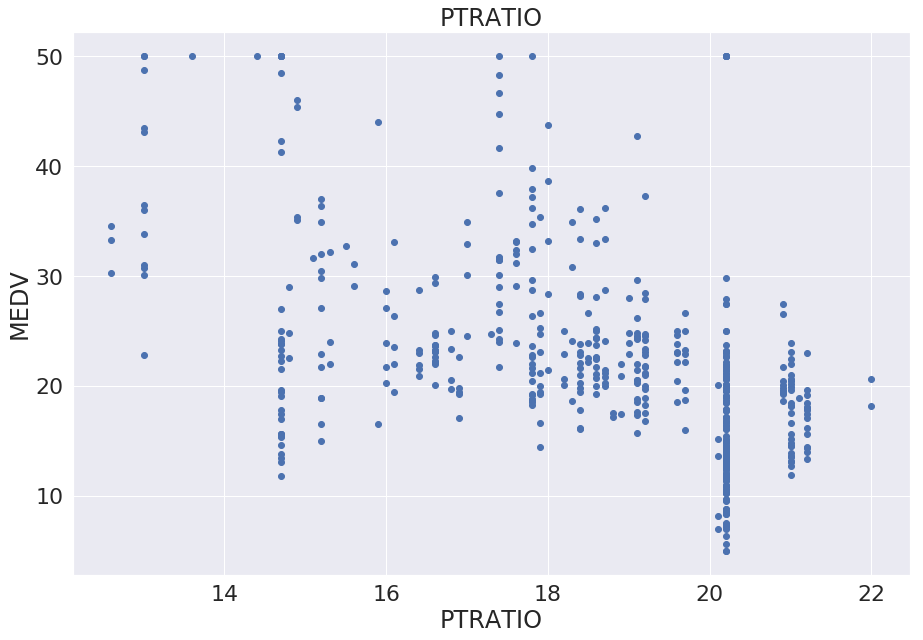

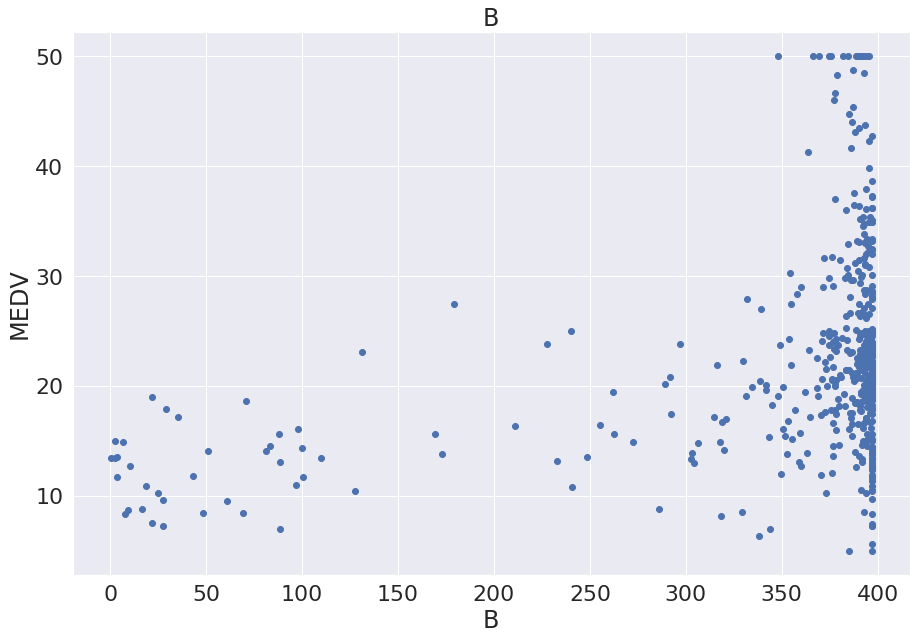

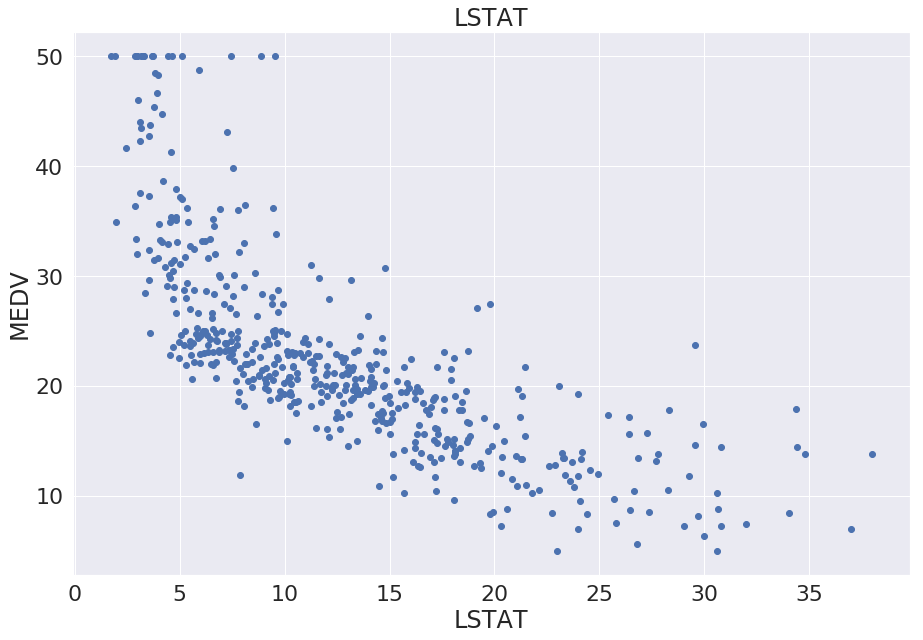

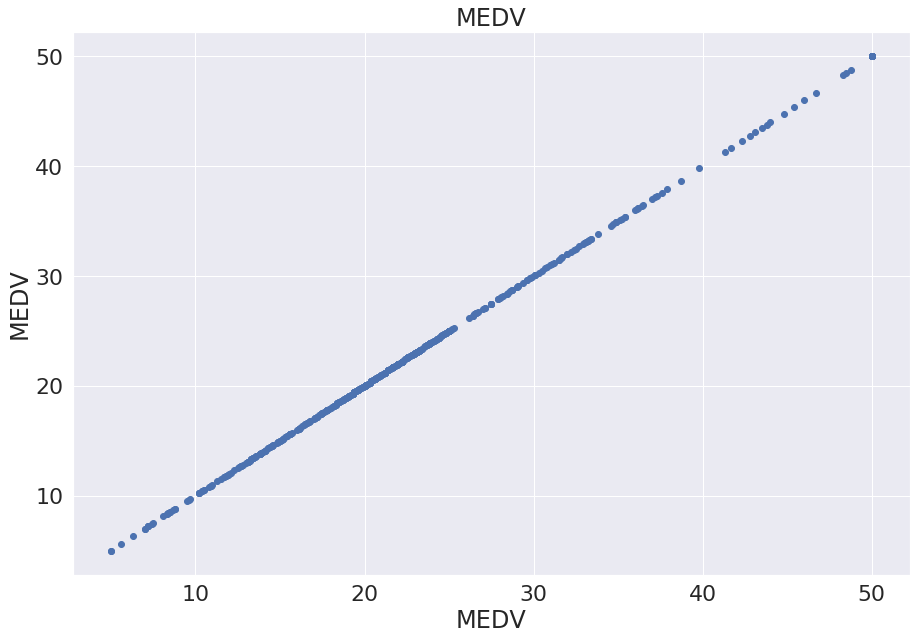

In [144]:
plt.figure(figsize=(20, 10))

#features = ['LSTAT', 'RM']
features = boston.columns.tolist()
target = boston['MEDV']

for i, col in enumerate(features):
    #plt.subplot(1, len(features) , i+1)
    plt.figure()
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.show()

[Text(0.5, 0, 'LSTAT')]

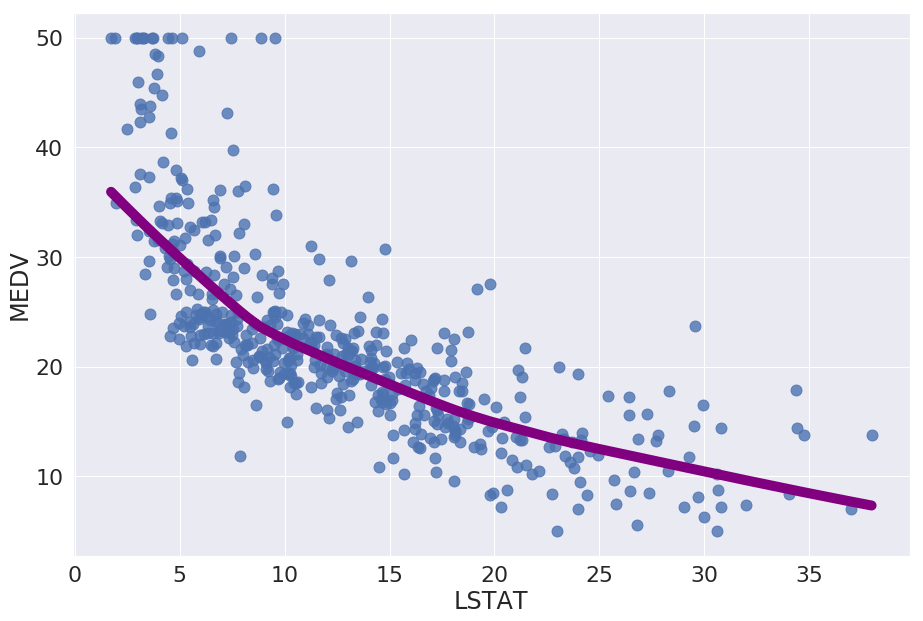

In [145]:
ax = sns.regplot(boston['LSTAT'], target, lowess=True, ci=False, line_kws={'lw':10, 'color':'purple'}, scatter_kws={'s': 120})
sns.set(font_scale=2)
ax.set(xlabel='LSTAT')

[Text(0.5, 0, '1/sqrt(LSTAT)')]

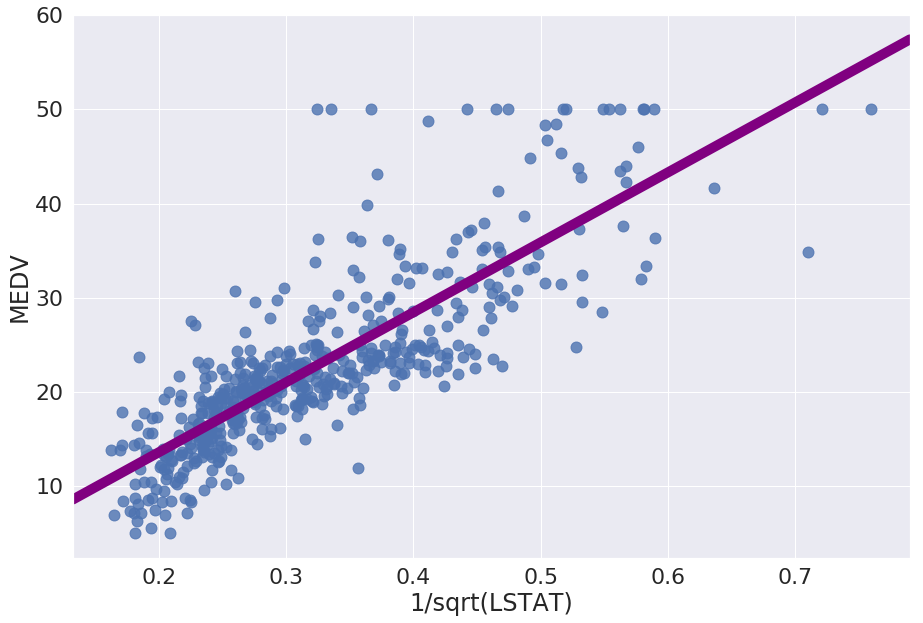

In [146]:
ax = sns.regplot(1/np.sqrt(boston['LSTAT']), target, ci=False, line_kws={'lw':10, 'color':'purple'}, scatter_kws={'s': 120})
sns.set(font_scale=2)
ax.set(xlabel='1/sqrt(LSTAT)')

In [159]:
#boston['LSTAT_proc'] = 1 / np.sqrt(boston['LSTAT'])
X = boston.drop('MEDV', axis=1)
#X = boston[['LSTAT', 'RM', 'LSTAT_proc']]
Y = boston['MEDV']

Разделим данные на тренировочную и тестовую выборки

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2020)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(404, 12)
(102, 12)
(404,)
(102,)


In [161]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [162]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [163]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, SGDRegressor, Lasso, Ridge
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [164]:
from sklearn.metrics import r2_score

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.3072974133447515
R2 score is 0.7785397985708


The model performance for testing set
--------------------------------------
RMSE is 4.144867810683442
R2 score is 0.798669602814889


In [165]:
lin_model.coef_

array([ -8.18294801,   0.20606126,  -2.04884322,  -5.70173458,
        14.36024911,   1.67728025, -12.14330212,   1.07597958,
        -6.75151511,   2.83654531,  -0.72771851,  31.72494397])

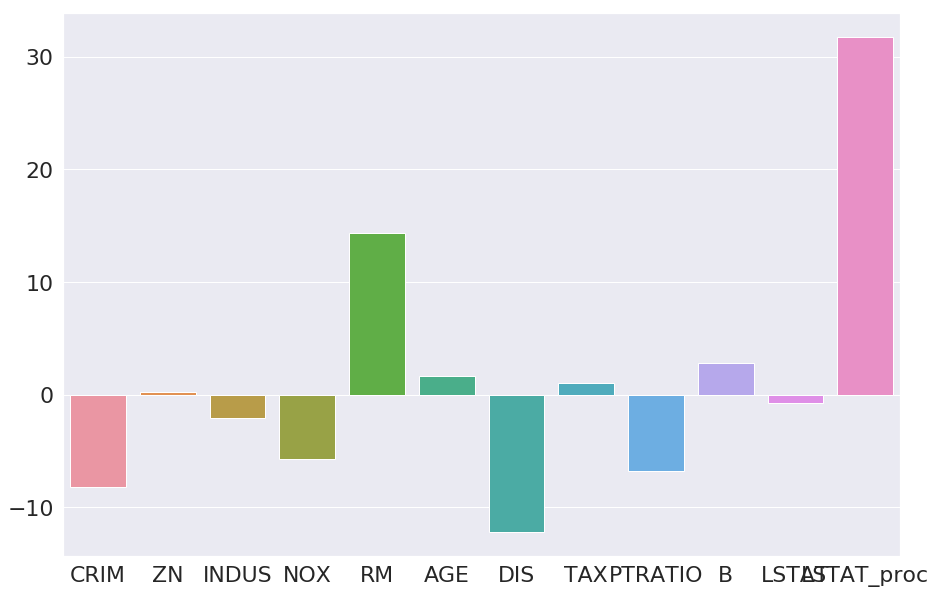

In [166]:
sns.barplot(X.columns.tolist(), lin_model.coef_)

Polynomial regression

In [167]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

Регрессия с использованием  всех признаков

In [168]:
X = boston.drop('MEDV', axis=1)
Y = boston['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2020)

In [169]:
degrees = np.arange(1, 5)
train_error = []
test_error = []
for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, Y_train)
    y_train_predict = pipeline.predict(X_train)
    y_test_predict = pipeline.predict(X_test)
    rmse_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

    print(f"degree = {degree}, train error: {rmse_train:.6f}, test error: {rmse_test:.1f}")
    train_error.append(rmse_train)
    test_error.append(rmse_test)
    coefs = pipeline.named_steps['linear_regression'].coef_
    print(f"number of coefs: {coefs.shape[0]}")
    zero_coefs = coefs[np.isclose(coefs, 0)]
    print(f"number of zero-valued coefs: {zero_coefs.shape[0]}")
    print()

degree = 1, train error: 4.307297, test error: 4.1
number of coefs: 12
number of zero-valued coefs: 0

degree = 2, train error: 2.658195, test error: 5.0
number of coefs: 90
number of zero-valued coefs: 0

degree = 3, train error: 0.000010, test error: 157.3
number of coefs: 454
number of zero-valued coefs: 1

degree = 4, train error: 0.000000, test error: 298.2
number of coefs: 1819
number of zero-valued coefs: 49



In [170]:
degrees = np.arange(1, 5)
train_error = []
test_error = []
for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = Lasso(1, max_iter=10000)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, Y_train)
    y_train_predict = pipeline.predict(X_train)
    y_test_predict = pipeline.predict(X_test)
    rmse_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

    print(f"degree = {degree}, train error: {rmse_train:.6f}, test error: {rmse_test:.1f}")
    train_error.append(rmse_train)
    test_error.append(rmse_test)
    coefs = pipeline.named_steps['linear_regression'].coef_
    print(f"number of coefs: {coefs.shape[0]}")
    zero_coefs = coefs[np.isclose(coefs, 0)]
    print(f"number of zero-valued coefs: {zero_coefs.shape[0]}")
    print()

degree = 1, train error: 5.289612, test error: 5.2
number of coefs: 12
number of zero-valued coefs: 2

degree = 2, train error: 3.198658, test error: 3.8
number of coefs: 90
number of zero-valued coefs: 47

degree = 3, train error: 1.877135, test error: 4.3
number of coefs: 454
number of zero-valued coefs: 221

degree = 4, train error: 1.173799, test error: 11.4
number of coefs: 1819
number of zero-valued coefs: 807



In [171]:
degrees = np.arange(1, 5)
train_error = []
test_error = []
for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = Ridge(1, max_iter=10000)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, Y_train)
    y_train_predict = pipeline.predict(X_train)
    y_test_predict = pipeline.predict(X_test)
    rmse_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

    print(f"degree = {degree}, train error: {rmse_train:.6f}, test error: {rmse_test:.1f}")
    train_error.append(rmse_train)
    test_error.append(rmse_test)
    coefs = pipeline.named_steps['linear_regression'].coef_
    print(f"number of coefs: {coefs.shape[0]}")
    zero_coefs = coefs[np.isclose(coefs, 0)]
    print(f"number of zero-valued coefs: {zero_coefs.shape[0]}")
    print()

degree = 1, train error: 4.510002, test error: 4.3
number of coefs: 12
number of zero-valued coefs: 0

degree = 2, train error: 2.793836, test error: 4.8
number of coefs: 90
number of zero-valued coefs: 0

degree = 3, train error: 2.802134, test error: 13.8
number of coefs: 454
number of zero-valued coefs: 1

degree = 4, train error: 2.470572, test error: 44.1
number of coefs: 1819
number of zero-valued coefs: 449



визуализация переобучения

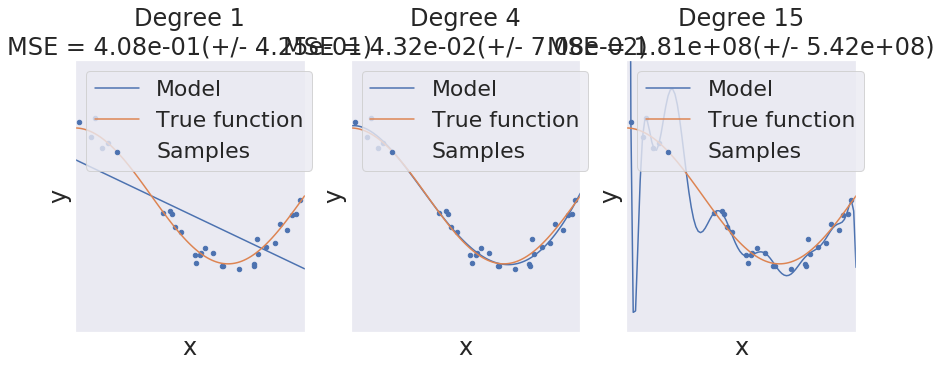

In [172]:
from sklearn.model_selection import cross_val_score
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

linear_regression


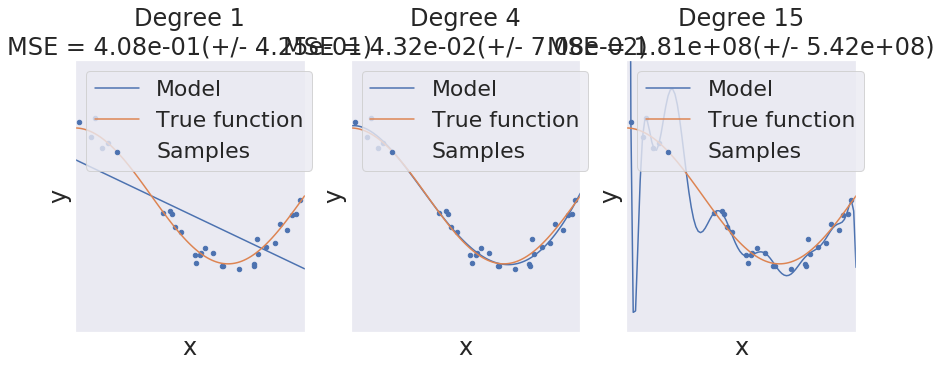

ridgecv


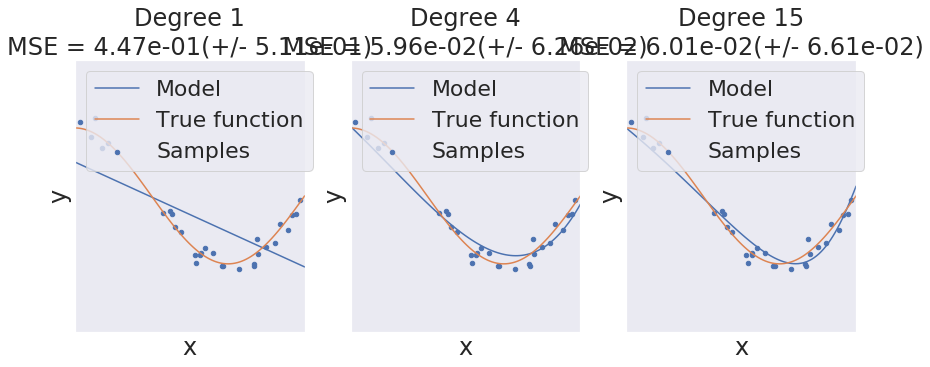

sgd


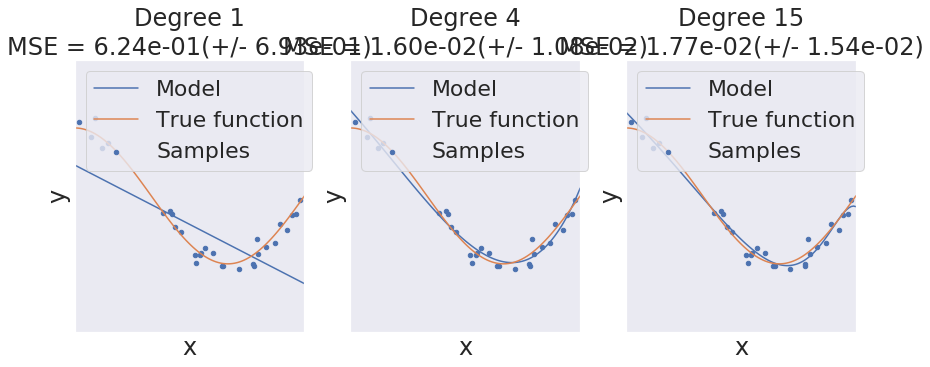

In [173]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X.reshape(-1, 1)).reshape(-1)
y = true_fun(X) + np.random.randn(n_samples) * 0.1
model_coefs = {
    'linear_regression': {},
    'ridgecv': {},
    'sgd': {}
}
models = {
    "linear_regression": LinearRegression(),
    "ridgecv": RidgeCV(),
    "sgd": SGDRegressor(max_iter=10000, loss='epsilon_insensitive')
}
for (k, model_name) in enumerate(models.keys()):
    print(model_name)
    plt.figure(figsize=(14, 5))
    for i, degree in enumerate(degrees):
        ax = plt.subplot(1, len(degrees), i + 1)
        plt.setp(ax, xticks=(), yticks=())
        polynomial_features = PolynomialFeatures(degree=degree,
                                                 include_bias=False)
        linear_regression = models[model_name]
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                             ("linear_regression", linear_regression)])
        pipeline.fit(X[:, np.newaxis], y)
        model_coefs[model_name][degree] = pipeline.named_steps['linear_regression'].coef_
        
        # Evaluate the models using crossvalidation
        scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                                 scoring="neg_mean_squared_error", cv=10)

        X_test = np.linspace(0, 1, 100)
        plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
        plt.plot(X_test, true_fun(X_test), label="True function")
        plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim((0, 1))
        plt.ylim((-2, 2))
        plt.legend(loc="best")
        plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()))
    plt.show()

In [174]:
for model_name in model_coefs.keys():
    print(model_name)
    for degree in model_coefs[model_name].keys():
        print(f"degree = {degree}")
        print(model_coefs[model_name][degree])
    print()

linear_regression
degree = 1
[-1.60931179]
degree = 4
[  0.46754142 -17.78954475  23.5926603   -7.26289872]
degree = 15
[-2.98291188e+03  1.03898766e+05 -1.87415056e+06  2.03715125e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08]

ridgecv
degree = 1
[-1.54375735]
degree = 4
[-3.27978563 -0.85759044  0.95439166  2.03820109]
degree = 15
[-2.80087868 -0.98288922  0.11351008  0.58282837  0.71107732  0.67244816
  0.56054335  0.42377008  0.28623667  0.15916003  0.04700995 -0.0491903
 -0.13009685 -0.19710665 -0.2518675 ]

sgd
degree = 1
[-1.74531046]
degree = 4
[-3.85631154 -1.25517341  1.1753287   2.79084341]
degree = 15
[-3.47572526 -1.1650794   0.33388956  0.97315371  1.11472852  1.0061842
  0.78919103  0.53977993  0.29638553  0.07665768 -0.11289317 -0.27148743
 -0.40109986 -0.50485613 -0.58619464]

